# A - Gerar o seguinte sinal:
S = sin(2.f1.t) + sin(2.f2.t) + sin(2.f3.t), sampling frequency 8kHz, gere 6 s de sinal,
onde:
f1 = 750 Hz;
f2 = 2500 Hz;
f3 = 3250 Hz

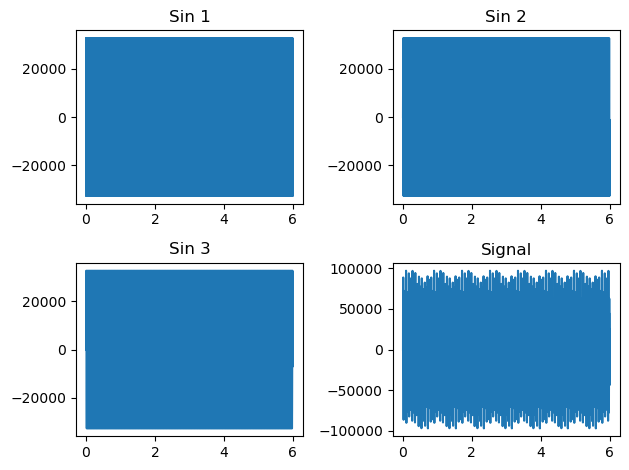

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt


def normalise(x,MAX_INT16=32767):
    maxamp = max(x)
    amp = math.floor(MAX_INT16/maxamp)
    norm = np.zeros(len(x))
    for i in range(len(x)):
        norm[i] = amp*x[i]
    return norm


def genSine(a, f0, fs, dur):
    t = np.arange(dur)
    sinusoid = a*np.sin(2*np.pi*t*(f0/fs))
    sinusoid = normalise(sinusoid)
    return sinusoid

fs = 8000
dur = 6*fs
tstep = 1 / fs
t = np.linspace(0, (dur-1)*tstep, dur)
sin1 = genSine(1,15,750,dur)
sin2 = genSine(1,15,2500,dur)
sin3 = genSine(1,15,3250,dur)
s = sin1 + sin2 + sin3

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(t, sin1)
ax1.set_title('Sin 1')
ax2.plot(t, sin2)
ax2.set_title('Sin 2')
ax3.plot(t, sin3)
ax3.set_title('Sin 3')
ax4.plot(t, s)
ax4.set_title('Signal')
plt.tight_layout()

# B - Calcule o espectro de frequências de S

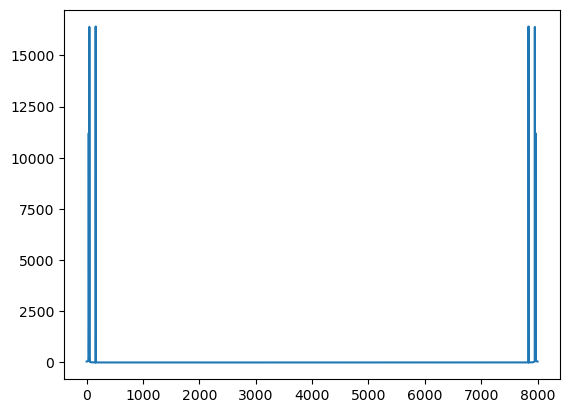

In [4]:
y = np.fft.fft(s)

fstep = fs / dur

f = np.linspace(0, (dur-1)*fstep, dur)

y_mag = np.abs(y) / len(s)

plt.plot(f, y_mag)

# C - Filtre o sinal S utilizando o filtro projetado, mostrando a saída do filtro e o espectro de frequências do sinal filtrado

# D -